<a href="https://colab.research.google.com/github/suciucos33/HACKATHON-TEAM-LASER-2021/blob/main/Try1_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import RK45
from scipy.integrate import solve_ivp
from scipy.integrate import complex_ode

In [90]:
def Master(t,p):

   gam = 0.001
   om = 0.1
   om_conj = np.conj(om)
   N_th = 0
   delta = 0

   p11 = p[0]
   p12 = p[1]
   p21 = p[2]
   p22 = p[3]
   dp22 = -gam*(N_th +1)*p22 +gam*N_th*p11 + 1j*om_conj*p21/2 - 1j*om*p12/2 
   dp11 = gam*(N_th +1)*p22 -gam*N_th*p11 - 1j*om_conj*p21/2 + 1j*om*p12/2
   dp12 = -gam*(2*N_th + 1)*p12/2 + 1j*delta*p12 - 1j*om_conj*(p22-p11)/2
   dp21 = -gam*(2*N_th + 1)*p21/2 - 1j*delta*p21 + 1j*om_conj*(p22-p11)/2

   dp = [dp11, dp12, dp21, dp22];
   return dp

In [91]:
# integrate the equations
t_vals = np.linspace(1,1000,1000) # times to report solution
p0 = [0,0,0,1]            # initial conditions for height
c = [0.001, 1,0,0];


In [92]:
system = complex_ode(Master, jac=None)
system.set_integrator('dopri5')
system.set_initial_value(p0,0)
y = np.zeros((len(t_vals),4),dtype=np.complex_);

for i in range(len(t_vals)):
  y[i,:]=system.integrate(t_vals[i])
  

  

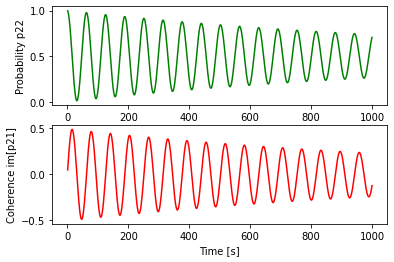

In [93]:
# plot results
f, (ax1, ax2) = plt.subplots(2, 1)


ax1.plot(t_vals,y[:,3].real,'g-')
ax2.plot(t_vals,y[:,2].imag,'r-')
ax1.set_xlabel('Time [s]')
ax2.set_xlabel('Time [s]')
ax1.set_ylabel('Probability p22')
ax2.set_ylabel('Coherence im[p21]')
#plt.legend(['p11',''])
f.show()
f.savefig('test.svg')